### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [11]:
# Sumamos los precios de todos los productos por tienda
facturacion_tienda1 = tienda["Precio"].sum()
facturacion_tienda2 = tienda2["Precio"].sum()
facturacion_tienda3 = tienda3["Precio"].sum()
facturacion_tienda4 = tienda4["Precio"].sum()

In [13]:
resumen_facturacion_tiendas = pd.DataFrame({
    'Facturación': [
        facturacion_tienda1,
        facturacion_tienda2,
        facturacion_tienda3,
        facturacion_tienda4
    ]},
    index=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
)

print(resumen_facturacion_tiendas)

           Facturación
Tienda 1  1.150880e+09
Tienda 2  1.116344e+09
Tienda 3  1.150880e+09
Tienda 4  1.116344e+09


# 2. Ventas por categoría

In [8]:
# verificar que categoria vende mas
ventas_por_categoria1 = tienda.groupby("Categoría del Producto")["Precio"].sum()
ventas_por_categoria2 = tienda2.groupby("Categoría del Producto")["Precio"].sum()
ventas_por_categoria3 = tienda3.groupby("Categoría del Producto")["Precio"].sum()
ventas_por_categoria4 = tienda4.groupby("Categoría del Producto")["Precio"].sum()

In [9]:
resumen = pd.DataFrame({
    'Tienda1': ventas_por_categoria1,
    'Tienda2': ventas_por_categoria2,
    'Tienda3': ventas_por_categoria3,
    'Tienda4': ventas_por_categoria4
})

print(resumen)

                             Tienda1      Tienda2      Tienda3      Tienda4
Categoría del Producto                                                     
Artículos para el hogar   12698400.0   14746900.0   15060000.0   15074500.0
Deportes y diversión      39290000.0   34744500.0   35593100.0   33350100.0
Electrodomésticos        363685200.0  348567800.0  329237900.0  283260200.0
Electrónicos             429493500.0  410831100.0  410775800.0  409476100.0
Instrumentos musicales    91299000.0  104990300.0   77380900.0   75102400.0
Juguetes                  17995700.0   15945400.0   19401100.0   20262200.0
Libros                     8784900.0   10091200.0    9498700.0    9321300.0
Muebles                  187633700.0  176426300.0  201072100.0  192528900.0


# 3. Calificación promedio de la tienda


In [14]:
# calificacion promedio por tienda
calificacion_promedio1 = tienda["Calificación"].mean()
calificacion_promedio2 = tienda2["Calificación"].mean()
calificacion_promedio3 = tienda3["Calificación"].mean()
calificacion_promedio4 = tienda4["Calificación"].mean()

In [15]:
resumen_calificacion_promedio_tiendas = pd.DataFrame({
    'calificacion': [
        calificacion_promedio1,
        calificacion_promedio2,
        calificacion_promedio3,
        calificacion_promedio4
    ]},
    index=['calificacion 1', 'calificacion 2', 'calificacion 3', 'calificacion 4']
)

print(resumen_calificacion_promedio_tiendas)

                calificacion
calificacion 1      3.976685
calificacion 2      4.037304
calificacion 3      4.048326
calificacion 4      3.995759


# 4. Productos más y menos vendidos

In [20]:
#calculamos los productos vendidos por tienda
productos_vendidos1 = tienda["Producto"].value_counts()
productos_vendidos2 = tienda2["Producto"].value_counts()
productos_vendidos3 = tienda3["Producto"].value_counts()
productos_vendidos4 = tienda4["Producto"].value_counts()

In [21]:
resumen_productos = pd.DataFrame({
    'Producto Más Vendido': [
        productos_vendidos1.idxmax(),
        productos_vendidos2.idxmax(),
        productos_vendidos3.idxmax(),
        productos_vendidos4.idxmax()
    ],
    'Cantidad (Más Vendido)': [
        productos_vendidos1.max(),
        productos_vendidos2.max(),
        productos_vendidos3.max(),
        productos_vendidos4.max()
    ],
    'Producto Menos Vendido': [
        productos_vendidos1.idxmin(),
        productos_vendidos2.idxmin(),
        productos_vendidos3.idxmin(),
        productos_vendidos4.idxmin()
    ],
    'Cantidad (Menos Vendido)': [
        productos_vendidos1.min(),
        productos_vendidos2.min(),
        productos_vendidos3.min(),
        productos_vendidos4.min()
    ]
}, index=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])

print(resumen_productos)

               Producto Más Vendido  Cantidad (Más Vendido)  \
Tienda 1                 Microondas                      60   
Tienda 2  Iniciando en programación                      65   
Tienda 3              Kit de bancas                      57   
Tienda 4                   Cama box                      62   

             Producto Menos Vendido  Cantidad (Menos Vendido)  
Tienda 1  Auriculares con micrófono                        33  
Tienda 2              Juego de mesa                        32  
Tienda 3    Bloques de construcción                        35  
Tienda 4         Guitarra eléctrica                        33  


# 5. Envío promedio por tienda

In [22]:
#calcular el promedio de envio por tienda
envio_promedio1 = tienda["Costo de envío"].mean()
envio_promedio2 = tienda2["Costo de envío"].mean()
envio_promedio3 = tienda3["Costo de envío"].mean()
envio_promedio4 = tienda4["Costo de envío"].mean()

In [23]:
resumen_envios_promedios_tiendas = pd.DataFrame({
    'calificacion': [
        envio_promedio1,
        envio_promedio2,
        envio_promedio3,
        envio_promedio4
    ]},
    index=['envio tienda 1', 'envio tienda 2', 'envio tienda 3', 'envio tienda 4']
)

print(resumen_envios_promedios_tiendas)

                calificacion
envio tienda 1  26018.609580
envio tienda 2  25216.235693
envio tienda 3  24805.680373
envio tienda 4  23459.457167


# ***Graficos***

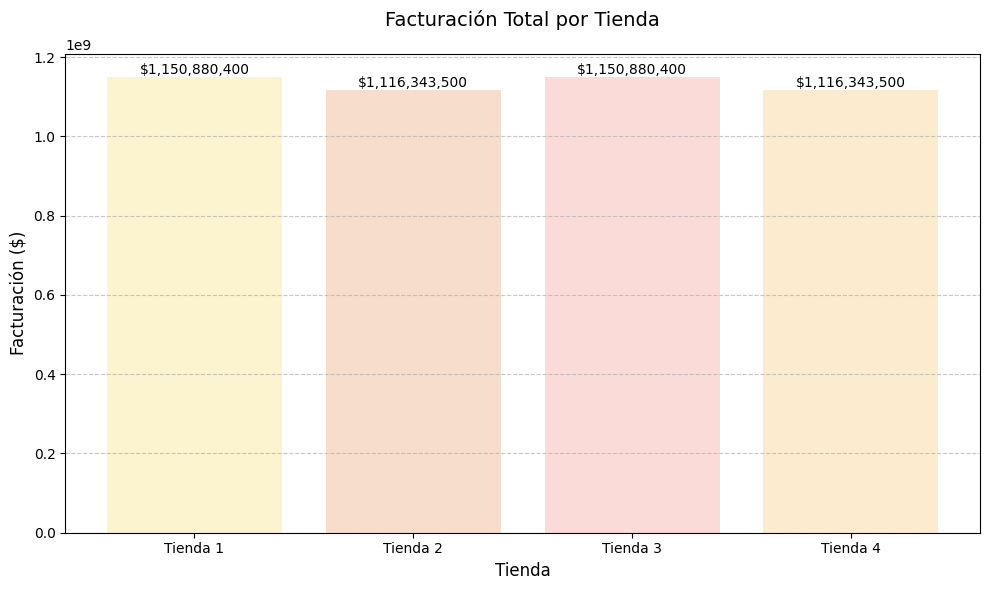

In [27]:
import matplotlib.pyplot as plt

# Datos de facturación
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturacion = [facturacion_tienda1, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4]

plt.figure(figsize=(10, 6))
bars = plt.bar(tiendas, facturacion, color=['#A9DFBF', '#aed6f1', '#F9E79F', '#d2b4de'])

# Añadir valores encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom')

plt.title('Facturación Total por Tienda', fontsize=14, pad=20)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Facturación ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

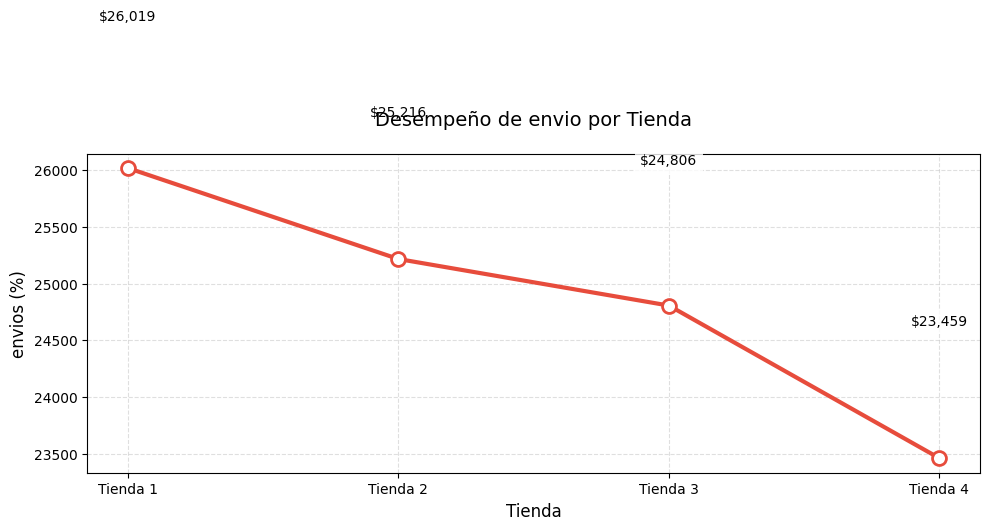

In [49]:
# Datos de envios por tienda
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
envio = [envio_promedio1, envio_promedio2, envio_promedio3, envio_promedio4]
# 3. Crear gráfico
plt.figure(figsize=(10, 6))
plt.plot(tiendas, envio,
         marker='o',  # Puntos destacados
         linestyle='-',  # Línea continua
         color='#e74c3c',  # Rojo intenso
         linewidth=3,
         markersize=10,
         markerfacecolor='white',  # Relleno blanco
         markeredgewidth=2)

# 4. Personalización
plt.title('Desempeño de envio por Tienda', fontsize=14, pad=20)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('envios (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)

# 5. Añadir etiquetas de valor
for i, valor in enumerate(envio):
    plt.text(i, valor * 1.05,  # 5% arriba del punto
             f'${valor:,.0f}',
             ha='center',
             fontsize=10,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.tight_layout()
plt.show()

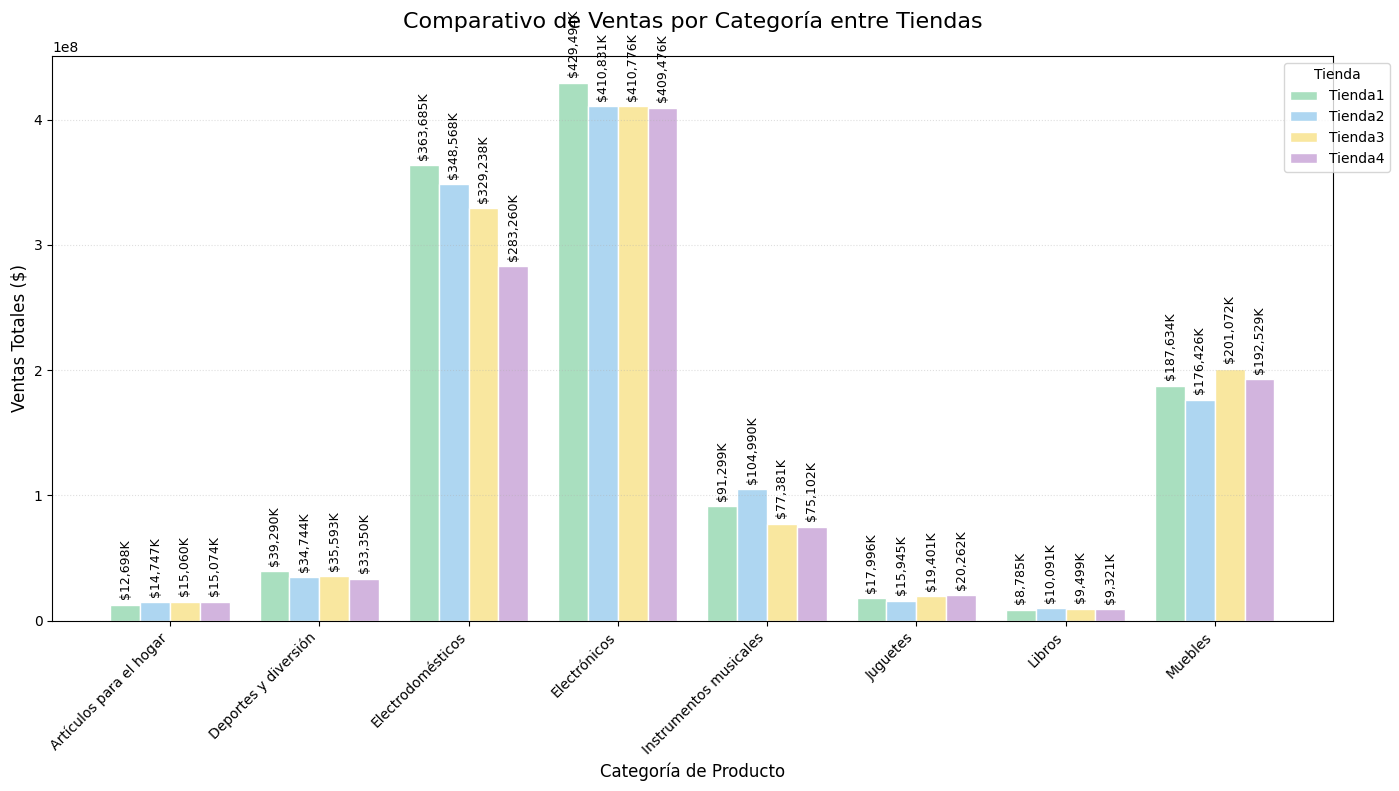

In [44]:
#grafico de barras apiladas por categoria
plt.figure(figsize=(14, 8))
n_categorias = len(resumen)
n_tiendas = len(resumen.columns)
bar_width = 0.2
index = np.arange(n_categorias)

#Crear barras para cada tienda
colors = ['#A9DFBF', '#aed6f1', '#F9E79F', '#d2b4de']

for i, tienda_col in enumerate(resumen.columns):
    plt.bar(index + i*bar_width, resumen[tienda_col],
            width=bar_width, color=colors[i], label=tienda_col, edgecolor='white')

# Personalización avanzada
plt.title('Comparativo de Ventas por Categoría entre Tiendas', fontsize=16, pad=20)
plt.xlabel('Categoría de Producto', fontsize=12)
plt.ylabel('Ventas Totales ($)', fontsize=12)
plt.xticks(index + bar_width*(n_tiendas-1)/2, resumen.index, rotation=45, ha='right')
plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle=':', alpha=0.4)

# Etiquetas de valor formateadas
for i, categoria in enumerate(resumen.index):
    for j, tienda_col in enumerate(resumen.columns):
        valor = resumen.loc[categoria, tienda_col]
        if valor > 0:
            plt.text(i + j*bar_width, valor + max(resumen.max())*0.01,
                     f'${valor/1000:,.0f}K',  # Formato: $1,234K
                     ha='center', va='bottom', fontsize=9, rotation=90)

plt.tight_layout()
plt.show()

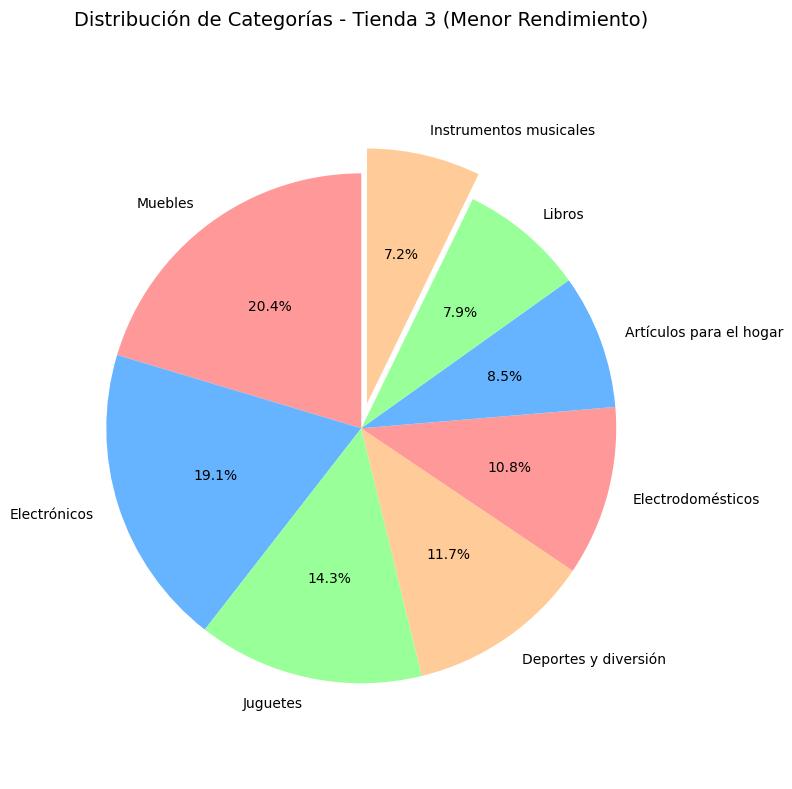

In [45]:
#  la Tienda 4 fue la menos eficiente
categorias_tienda4 = tienda4['Categoría del Producto'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(categorias_tienda4,
        labels=categorias_tienda4.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
        explode=[0.1 if cat == categorias_tienda4.idxmin() else 0 for cat in categorias_tienda4.index])

plt.title('Distribución de Categorías - Tienda 3 (Menor Rendimiento)', fontsize=14, pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

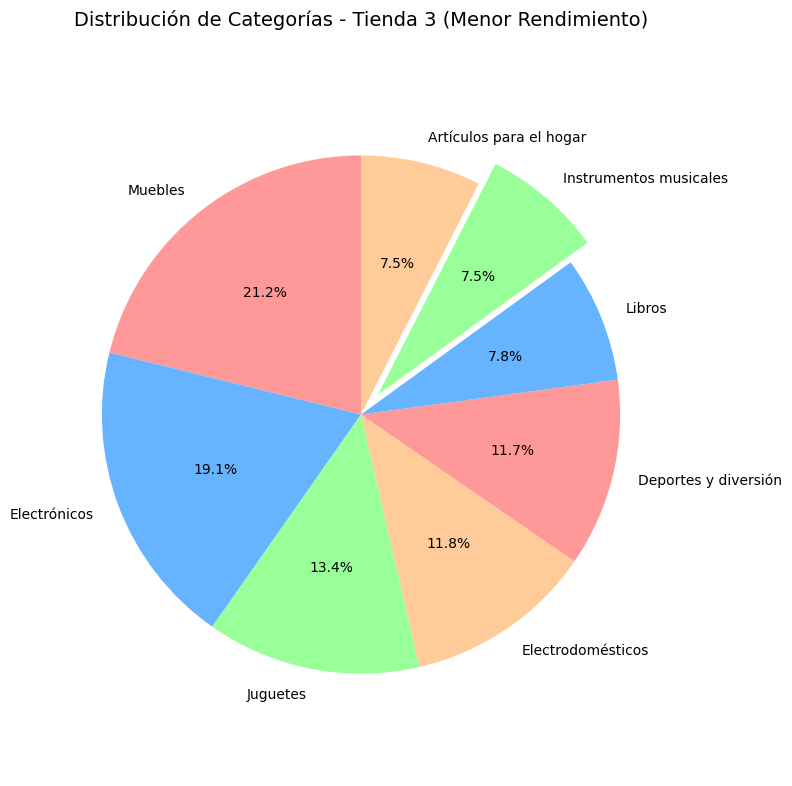

In [50]:
#  la Tienda 3 fue la menos eficiente
categorias_tienda3 = tienda3['Categoría del Producto'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(categorias_tienda3,
        labels=categorias_tienda3.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
        explode=[0.1 if cat == categorias_tienda3.idxmin() else 0 for cat in categorias_tienda3.index])

plt.title('Distribución de Categorías - Tienda 3 (Menor Rendimiento)', fontsize=14, pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

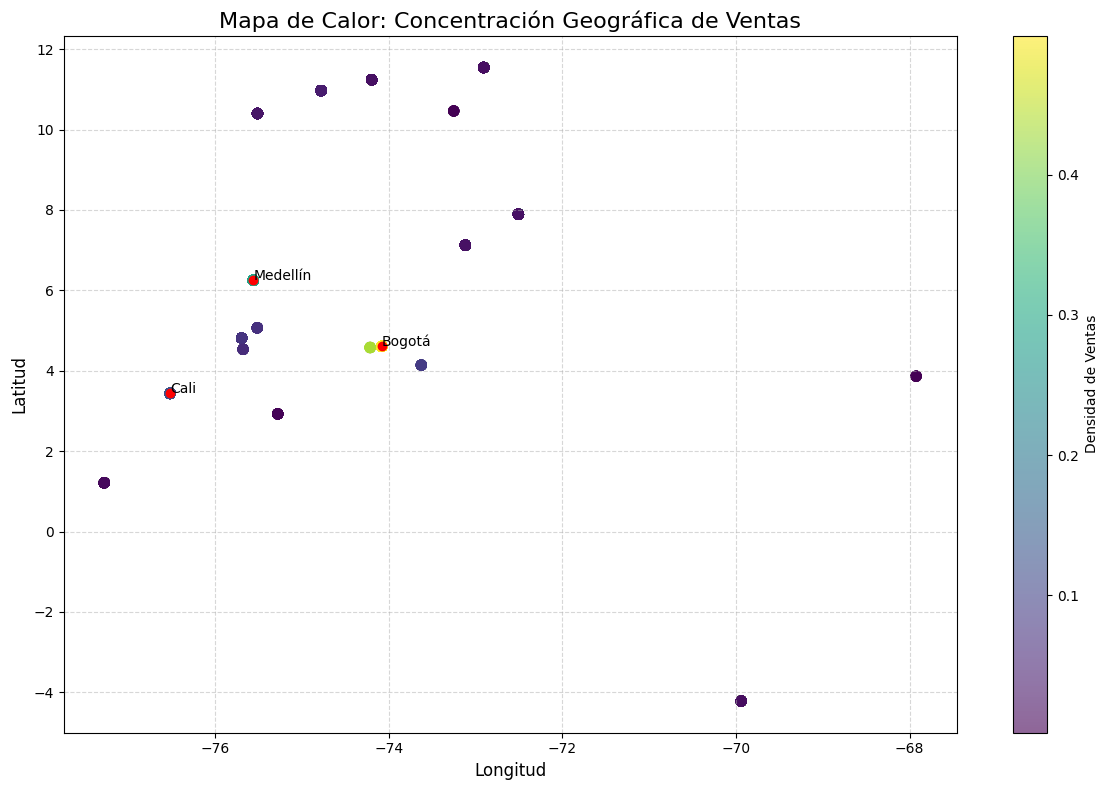

In [48]:

# Combinar datos de todas las tiendas
todas_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])

# Calcular densidad de puntos
xy = np.vstack([todas_tiendas['lon'], todas_tiendas['lat']])
z = gaussian_kde(xy)(xy)

# Crear figura
plt.figure(figsize=(12, 8))

# Scatter plot con densidad
sc = plt.scatter(todas_tiendas['lon'], todas_tiendas['lat'],
                c=z, s=50, cmap='viridis', alpha=0.6)

# Personalización
plt.title('Mapa de Calor: Concentración Geográfica de Ventas', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.colorbar(sc, label='Densidad de Ventas')

# Añadir ciudades principales (ejemplo)
ciudades = {
    'Bogotá': (-74.0817, 4.6097),
    'Medellín': (-75.5636, 6.2518),
    'Cali': (-76.5225, 3.4372)
}

for ciudad, coord in ciudades.items():
    plt.plot(coord[0], coord[1], 'ro')
    plt.text(coord[0], coord[1], ciudad, fontsize=10)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ***Informe final***

# **Informe Final

teniendo en cuenta lo analizados por medio de los datos proporcionado se identifica lo siguiente:

### **1. Ingresos Totales por Tienda**  
segun lo observado en el primer grafico de barras se identifico que:
- **Tienda 1 y 3** lidera en ventas con un valor de 1.150.880 M
- **Tienda 2 y 4** registró los ingresos más bajos con un valor de 1.116.343 M

### **2. Desempeño por Categoría**  
segun lo observado en el grafico de barras agrupadas se identifica lo siguientes:
- **Electrónicos**: bajas ventas en Tienda 4
- **Electrodomésticos**: Baja ventas en Tienda 4
teniendo en cuenta lo anterior, se identifica que la tienda 4 presenta bajas ventas en categorias claves y de mayor ganancia

### **3. Satisfacción del Cliente**  
teniendo en cuenta los resultados de los promedios de calificacion por tienda se evidencia que no se encuentra una diferencia significativa en esta variable analizada sin embargo, las tiendas que presenta un promedio por debajo de 4 seria la tienda 1 y 4


### **4. Productos Más/Menos Vendidos**  
frente a los producto mas y menos vendidos se identifica que:
- **Tienda 3**: presenta una cantidad menor de producto mas vendidos en comparacion a las otras lo cual no supera las 60 unidades
- **Tienda 2**: presenta una cantidad menor de producto menos vendidos en comparacion a las otras presentado  32 unidades de ventas

### **5. Costo Logístico**  
teniendo en cuenta el grafico de dispersion  
- **Tienda 1** tiene el costo de envío más alto
- **Tienda 4**: tiene  el costo de envio mas bajo

---

## **📊 Análisis Comparativo (Fortalezas y Debilidades)**  

| **Métrica**          | **Tienda 1**       | **Tienda 2**       | **Tienda 3**       | **Tienda 4**       |
|----------------------|--------------------|--------------------|--------------------|--------------------|
| **Ingresos**         | Alto        | Medio      | Alto      | Medio       |
| **Calificación**     | 3.97             | 4            | 4             | 3.99 ★             |
| **Categoría Fuerte** | Electrónicos y electrodomesticos    | Intrumentos Musicales           | Muebles         | Articulos para el hogar y juguetes |


## **Observacion Final**  
**Vender la Tienda 4** debido a:  

1. Bajo rendimiento financiero  

2. Presenta rendimientos en categoria pocos rentables   

